<a href="https://www.kaggle.com/code/azminetoushikwasi/eda-fe-coursera-data-viz-analysis?scriptVersionId=96288566" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Exploratory Data Analysis - Coursera Courses

# 1. Introduction

## 1.1. About Coursera
Coursera Inc. is a U.S.-based massive open online course provider founded in 2012 by Stanford University computer science professors Andrew Ng and Daphne Koller. Coursera works with universities and other organizations to offer online courses, certifications, and degrees in a variety of subjects.

- Stock price: COUR (NYSE) $15.51 +0.02 (+0.13%) - May 20, 10:12 AM EDT
- Founded: 2012
- Headquarters: California, United States
- Users: 92 million (2021)
- Employees: 1,138 (December 2021)
- Available in: Multilingual (40)
- Founders: Andrew Ng, Daphne Koller

## 1.2. EDA
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

# 2. Dataset Exploratiion

### Dataset Used : Coursera Course Dataset
#### URL : https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset

## Data Brief
Course dataset scrapped from Coursera website. This dataset contains mainly 6 columns and 890 course data. The detailed description:

1. course_title : Contains the course title.
2. course_organization : It tells which organization is conducting the courses.
3. courseCertificatetype : It has details about what are the different certifications available in courses.
4. course_rating : It has the ratings associated with each course.
5. course_difficulty : It tells about how difficult or what is the level of the course.
6. coursestudentsenrolled : It has the number of students that are enrolled in the course.

# 3. Data Loading and Basic Review

## 3.1. Required Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import warnings
from scipy import stats

## 3.2. Configuration

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
warnings.filterwarnings('ignore')

/kaggle/input/coursera-course-dataset/coursea_data.csv


# 4. Data Loading and Basic Expploration

In [3]:
df=pd.read_csv("/kaggle/input/coursera-course-dataset/coursea_data.csv")

In [4]:
df=df.drop("Unnamed: 0",axis=1)

So, 1 numarical object only. But, we can turn some others to numarical too.

In [5]:
df.describe(include=['object']).T

,count,unique,top,freq
course_title,891,888,Developing Your Musicianship,2
course_organization,891,154,University of Pennsylvania,59
course_Certificate_type,891,3,COURSE,582
course_difficulty,891,4,Beginner,487
course_students_enrolled,891,205,120k,22


Mean course rating is 4.677329. Quite high, as the rating can be given from 0-5. Minimum is 3.3, highest is 5 - proves so.

## Initial plan for data exploration

Data Exploration
1. Ploting course_rating to get a overview of the distribution.
2. analyzing course Certificate types values.

Data Cleaning
1. Deleting first Unnamed column
2. Deleting course name - not necessary now; as all the values are unique

# 5. Data Exploration
 

## 5.1. Basic Rating distribution :

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb764a2e1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb764a3f410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb764a2e990>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb764a3fad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb764a3fe10>],
 'means': []}

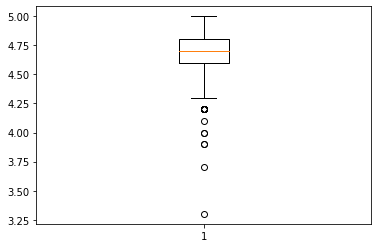

In [6]:
plt.boxplot(df['course_rating'])

<AxesSubplot:>

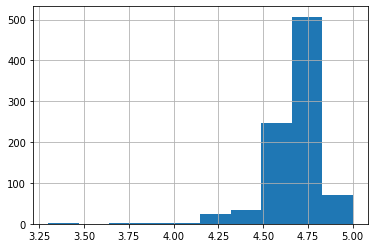

In [7]:
# Ploting course_rating to get a overview of the distribution.
df['course_rating'].hist()

#### Findings:
Average course rating is quite higher, compared to lowest and maximum value.

Rating distribution per course difficulty :

## 5.2. Frequency based on difficulty.

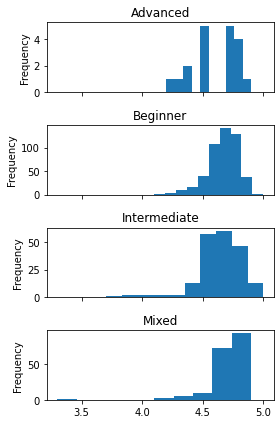

In [8]:
g = df.groupby('course_difficulty')['course_rating']
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(4, 6))

for i, (type,rating) in enumerate(g):
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type)
fig.tight_layout()

#### Insight: 
Advanced courses' rating has some ups-and downs; maybe due to low frequency.<br>
Beginner course has distribution quite similiar to total rating chart.<br>
Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical.


## 5.3. Rating distribution per course type :

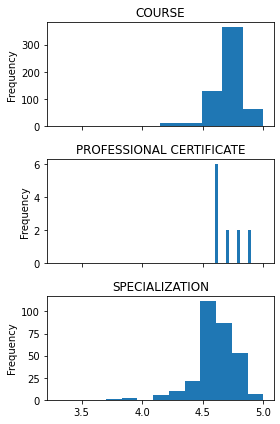

In [9]:
g = df.groupby('course_Certificate_type')['course_rating']
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(4, 6))

for i, (type,rating) in enumerate(g):
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type,bins=10)
fig.tight_layout()

In [10]:
g.describe()

,count,mean,std,min,25%,50%,75%,max
course_Certificate_type,,,,,,,,
COURSE,582.0,4.707045,0.151647,3.3,4.6,4.70,4.8,5.0
PROFESSIONAL CERTIFICATE,12.0,4.700000,0.120605,4.6,4.6,4.65,4.8,4.9
SPECIALIZATION,297.0,4.618182,0.167874,3.7,4.5,4.60,4.7,5.0


#### Findings and Insight:
1. Specializations has lower mean value than courses, but the distribution is interesting. specialization has good distribution values on right, but normal courses are on left.

## 5.4. Rating distribution per course type : Combined

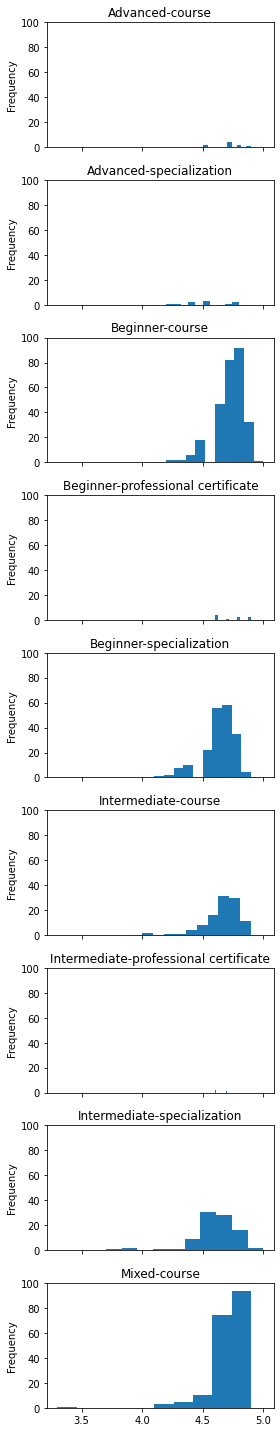

In [11]:
g = df.groupby(['course_difficulty','course_Certificate_type'])['course_rating']
fig, axes = plt.subplots(g.ngroups, sharex=True, figsize=(4, 20))

for i, (type,rating) in enumerate(g):
    axes[i].set_ylim(0, 100)
    ax = rating.plot.hist('course_rating',ax=axes[i], legend=False,title=type[0]+"-"+type[1].lower(),bins=10)
fig.tight_layout()

#### Findings:
Mixed - Course has a unstable distribution, othes have normal distribution.

## 5.5. Analyzing course Certificate types values.

<AxesSubplot:ylabel='course_difficulty'>

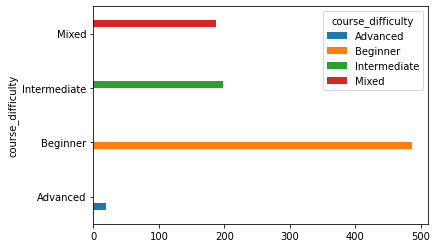

In [12]:
df.groupby('course_difficulty').course_difficulty.value_counts().unstack().plot.barh()

<AxesSubplot:ylabel='course_Certificate_type'>

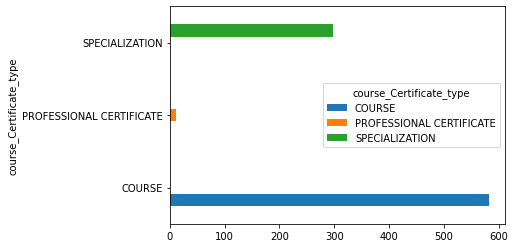

In [13]:
df.groupby('course_Certificate_type').course_Certificate_type.value_counts().unstack().plot.barh()

#### Findings:
Course Counts:
- *Beginner > Intermidiate > Advanced*. Not enough data for advanced courses.
- *Courses > Specialization > Professional certificate.* Not enough data for Professional certificates.

## 6 Data Wrangling

## Data Cleaning
1. Deleting first Unnamed column
2. Deleting course name - not necessary now; as all the values are unique
3. Others will be done as necessary.

In [14]:
df=df.drop(['course_title'],axis=1)

#Deleting course name - not necessary now; as all the values are unique - done at begining

# 7. Feature Engineering

## 7.1. Modifying course_students_enrolled column

In [15]:
df_fe1=df.copy()


In [16]:
def course_students_enrolled_modifier(x):
    return x[:-2]

In [17]:
df_fe1['course_students_enrolled_modified']=df_fe1['course_students_enrolled'].apply(course_students_enrolled_modifier)
df_fe1['course_students_enrolled_modified']=df_fe1['course_students_enrolled_modified'].apply(pd.to_numeric)
df_fe1 =df_fe1.drop(['course_students_enrolled'],axis=1)
df_fe1

,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled_modified
0,(ISC)²,SPECIALIZATION,4.7,Beginner,5.0
1,University of Pennsylvania,COURSE,4.7,Intermediate,1.0
2,Johns Hopkins University,COURSE,4.5,Mixed,13.0
3,Yale University,COURSE,4.7,Mixed,9.0
4,Indian School of Business,COURSE,4.8,Mixed,32.0
...,...,...,...,...,...
886,Mail.Ru Group,SPECIALIZATION,4.5,Intermediate,5.0
887,Saint Petersburg State University,COURSE,4.8,Mixed,2.0
888,E-Learning Development Fund,SPECIALIZATION,4.5,Intermediate,3.0
889,Saint Petersburg State University,SPECIALIZATION,4.6,Intermediate,9.0


## 7.2. Modifying course_difficulty column to numarical

In [18]:
def course_difficulty_modifier(x):
    if x=="Beginner":
        return "0"
    elif x=="Intermediate":
        return "1"
    elif x=="Mixed":
        return "0.5"
    elif x=="Advanced":
        return "2"
    else:
        return "0" 
"""as most courses are beginner level, we are assuming undefined will be beginner too."""

'as most courses are beginner level, we are assuming undefined will be beginner too.'

In [19]:
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty'].apply(course_difficulty_modifier)
df_fe1['course_difficulty_modified']=df_fe1['course_difficulty_modified'].apply(pd.to_numeric)
df_fe1 =df_fe1.drop(['course_difficulty'],axis=1)
df_fe1

,course_organization,course_Certificate_type,course_rating,course_students_enrolled_modified,course_difficulty_modified
0,(ISC)²,SPECIALIZATION,4.7,5.0,0.0
1,University of Pennsylvania,COURSE,4.7,1.0,1.0
2,Johns Hopkins University,COURSE,4.5,13.0,0.5
3,Yale University,COURSE,4.7,9.0,0.5
4,Indian School of Business,COURSE,4.8,32.0,0.5
...,...,...,...,...,...
886,Mail.Ru Group,SPECIALIZATION,4.5,5.0,1.0
887,Saint Petersburg State University,COURSE,4.8,2.0,0.5
888,E-Learning Development Fund,SPECIALIZATION,4.5,3.0,1.0
889,Saint Petersburg State University,SPECIALIZATION,4.6,9.0,1.0


# 8. More EDA

## 8.1. Data Exploration of newly engineered columns

In [20]:
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

,course_difficulty_modified,course_students_enrolled_modified
count,891.000000,881.000000
mean,0.369809,8.511918
std,0.472738,10.731756
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,5.000000
75%,0.500000,9.000000
max,2.000000,83.000000


course_students_enrolled_modified has some empty columns, so we have to fill them. 

<AxesSubplot:ylabel='Frequency'>

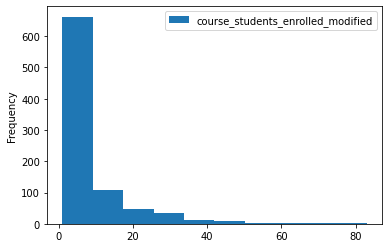

In [21]:
df_fe1[['course_students_enrolled_modified']].plot.hist()

so , most of the frequencies are in between 0-10, so, using average-1; so avoid the effect of outliers.

In [22]:
df_fe1['course_students_enrolled_modified'].fillna((df_fe1['course_students_enrolled_modified'].mean()-1), inplace=True)
df_fe1[['course_difficulty_modified','course_students_enrolled_modified']].describe()

,course_difficulty_modified,course_students_enrolled_modified
count,891.000000,891.000000
mean,0.369809,8.500695
std,0.472738,10.671816
min,0.000000,1.000000
25%,0.000000,2.000000
50%,0.000000,5.000000
75%,0.500000,9.000000
max,2.000000,83.000000


In [23]:
df_numaric=df_fe1.select_dtypes(include=np.number)

# 9. Corelation Analysis
## 9.1. Finding relation between columns

In [24]:
corrM = df_numaric.corr()
corrM

,course_rating,course_students_enrolled_modified,course_difficulty_modified
course_rating,1.000000,0.015939,-0.089810
course_students_enrolled_modified,0.015939,1.000000,-0.011343
course_difficulty_modified,-0.089810,-0.011343,1.000000


<AxesSubplot:xlabel='course_rating', ylabel='course_difficulty_modified'>

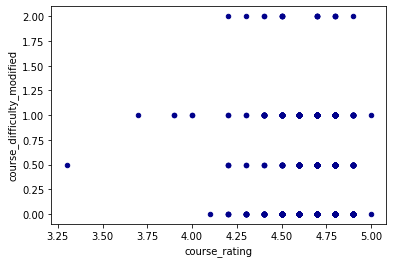

In [25]:
df_numaric.plot.scatter(x='course_rating', y='course_difficulty_modified',c='DarkBlue')

#### Findings : 
No effective coorelation.

## 9.2. University wise analysis

course_organization with more than 10 courses - students enrolled (k)

In [26]:
g_uni=df_fe1.groupby("course_organization")["course_students_enrolled_modified",'course_rating'].agg({"course_students_enrolled_modified":'size',"course_students_enrolled_modified":'mean','course_rating':'mean'}).reset_index()
g_uni

,course_organization,course_students_enrolled_modified,course_rating
0,(ISC)²,2.666667,4.733333
1,Amazon Web Services,5.833333,4.550000
2,American Institute of Business and Economics,1.000000,4.400000
3,American Museum of Natural History,1.000000,4.750000
4,Arizona State University,9.285714,4.771429
...,...,...,...
149,Yonsei University,13.750000,4.750000
150,deeplearning.ai,18.344495,4.743750
151,École Polytechnique,19.000000,4.800000
152,École Polytechnique Fédérale de Lausanne,11.500000,4.725000


In [27]:
g_uni_2=df_fe1.groupby("course_organization")["course_students_enrolled_modified"].agg({'size'}).reset_index()
g_uni['size']=g_uni_2['size']
g_uni_final=g_uni[g_uni_2['size']> 10]
g_uni_final.sort_values(by=["course_students_enrolled_modified","course_rating"],ascending=False)

,course_organization,course_students_enrolled_modified,course_rating,size
150,deeplearning.ai,18.344495,4.743750,16
123,"University of California, Irvine",16.148148,4.596296,27
48,Johns Hopkins University,15.678571,4.660714,28
20,Duke University,14.500000,4.664286,28
38,IBM,13.636364,4.613636,22
135,University of Michigan,12.097561,4.729268,41
85,Stanford University,10.250000,4.768750,16
138,University of Pennsylvania,9.974778,4.696610,59
148,Yale University,9.117647,4.817647,17
9,Berklee College of Music,8.928571,4.807143,14


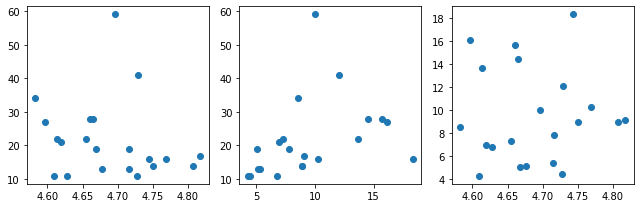

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
axes[0].scatter(g_uni_final["course_rating"], g_uni_final['size'])
axes[1].scatter(g_uni_final["course_students_enrolled_modified"], g_uni_final['size'])
axes[2].scatter(g_uni_final["course_rating"], g_uni_final["course_students_enrolled_modified"])
fig.tight_layout()
plt.show()

In [29]:
corrM = g_uni_final.corr()
corrM

,course_students_enrolled_modified,course_rating,size
course_students_enrolled_modified,1.000000,0.001428,0.361003
course_rating,0.001428,1.000000,-0.179260
size,0.361003,-0.179260,1.000000


#### Findings
1. Mean number of students enrolled per university has some positive corelation to number of courses offered by the university. The more courses are offered, the more students are enroled in average.

# 10. Key Findings and Insights

1. Average course rating is quite higher, compared to lowest and maximum value. So, the cours quality is being maintained.
2. Advanced courses' rating has some ups-and downs; maybe due to low frequency.
3. Beginner course has distribution quite similiar to total rating chart, as big portion of the data is from them, and he number of beginner level courses are high.
4. Intermidiate course's rating top is not as sharp of others, that may say - as the participants has some knowledge on the topic, they can judge better and being critical.
5. Specializations has lower mean value than courses, but the distribution is interesting. specialization has good distribution values on right, but normal courses are on left.
6. No effective coorelation between course_difficulty,course_students_enrolled, course rating.
7. No effective coorelation between course_students_enrolled, course rating per university.
8. Mean number of students enrolled per university has some positive corelation to number of courses offered by the university. The more courses are offered, the more students are enroled in average.

# 11. Exporting Engineered data

In [30]:
df_fe1.to_csv("coursera_data_FEd.csv")